In [1]:
import pandas as pd
df_erosion=pd.read_csv("o-ring-erosion-only.csv",
                      names=['Number of O-ring at risk on a given flight','Number experiencing thermal distress',
                            'Launch temperature(degrees F)','Leak-check pressure(psi)','Temporal order of flight'])

In [2]:
df_erosion.head()

,Number of O-ring at risk on a given flight,Number experiencing thermal distress,Launch temperature(degrees F),Leak-check pressure(psi),Temporal order of flight
0,6,0,66,50,1
1,6,1,70,50,2
2,6,0,69,50,3
3,6,0,68,50,4
4,6,0,67,50,5


In [3]:
df_erosion.describe()

,Number of O-ring at risk on a given flight,Number experiencing thermal distress,Launch temperature(degrees F),Leak-check pressure(psi),Temporal order of flight
count,23.0,23.000000,23.000000,23.000000,23.00000
mean,6.0,0.391304,69.565217,152.173913,12.00000
std,0.0,0.656376,7.057080,68.221332,6.78233
min,6.0,0.000000,53.000000,50.000000,1.00000
25%,6.0,0.000000,67.000000,75.000000,6.50000
50%,6.0,0.000000,70.000000,200.000000,12.00000
75%,6.0,1.000000,75.000000,200.000000,17.50000
max,6.0,2.000000,81.000000,200.000000,23.00000


In [4]:
df_erosion.shape

(23, 5)

In [5]:
df_erosion.columns

Index(['Number of O-ring at risk on a given flight',
       'Number experiencing thermal distress', 'Launch temperature(degrees F)',
       'Leak-check pressure(psi)', 'Temporal order of flight'],
      dtype='object')

Text(0.5, 1.0, '因变量‘Number experiencing thermal distress’频数分布直方图')

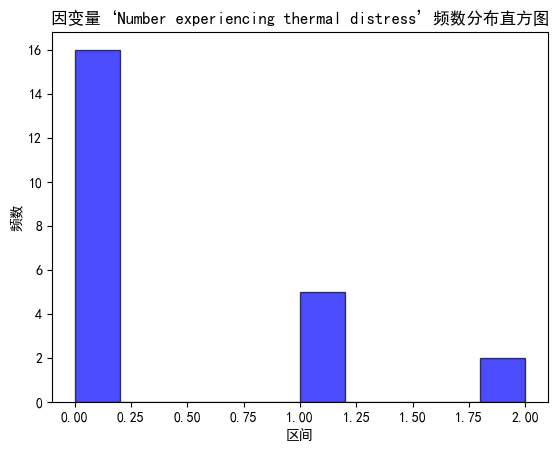

In [6]:
import matplotlib.pyplot as plt
plt.rcParams['font.family']="simHei"   #汉字显示 字体设置
plt.hist(df_erosion['Number experiencing thermal distress'],
        bins=10,
        facecolor="blue",
        edgecolor="black",
        alpha=0.7)
plt.xlabel('区间')
plt.ylabel('频数')
plt.title("因变量‘Number experiencing thermal distress’频数分布直方图")

In [7]:
import numpy as np
print(np.mean(df_erosion['Number experiencing thermal distress']))
print(np.var(df_erosion['Number experiencing thermal distress']))

0.391304347826087
0.4120982986767487


In [8]:
df_erosion.rename(columns={'Number of O-ring at risk on a given flight':'num_rings',
                          'Launch temperature(degrees F)':'temperature',
                          'Leak-check pressure(psi)':'pressure',
                          'Number experiencing thermal distress':'num_distress',
                          'Temporal order of flight':'order'},inplace=True)
order=['num_rings','temperature','pressure','order','num_distress']
df_erosion=df_erosion[order]

In [9]:
df_erosion.head()

,num_rings,temperature,pressure,order,num_distress
0,6,66,50,1,0
1,6,70,50,2,1
2,6,69,50,3,0
3,6,68,50,4,0
4,6,67,50,5,0


In [10]:
import statsmodels.formula.api as smf

In [11]:
x=np.column_stack((df_erosion['num_rings'],df_erosion['temperature']
                   ,df_erosion['pressure'],df_erosion['order']))

In [12]:
import statsmodels.api as sm
glm=smf.glm('num_distress~num_rings+temperature+pressure+order'
            ,df_erosion,family=sm.families.Poisson())

In [13]:
results=glm.fit()
print(results.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:           num_distress   No. Observations:                   23
Model:                            GLM   Df Residuals:                       19
Model Family:                 Poisson   Df Model:                            3
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -15.317
Date:                Thu, 01 May 2025   Deviance:                       15.407
Time:                        18:07:59   Pearson chi2:                     23.4
No. Iterations:                     5   Pseudo R-squ. (CS):             0.2633
Covariance Type:            nonrobust                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       0.0984      0.090      1.094      

In [14]:
results.params

Intercept      0.098418
num_rings      0.590510
temperature   -0.088329
pressure       0.007007
order          0.011480
dtype: float64

In [15]:
df_erosion['predict_result']=results.predict(df_erosion)
df_erosion['predict_result']=df_erosion['predict_result'].apply(lambda x:round(x,3))

In [16]:
df_erosion

,num_rings,temperature,pressure,order,num_distress,predict_result
0,6,66,50,1,0,0.161
1,6,70,50,2,1,0.114
2,6,69,50,3,0,0.126
3,6,68,50,4,0,0.140
4,6,67,50,5,0,0.154
5,6,72,50,6,0,0.100
6,6,73,100,7,0,0.132
7,6,70,100,8,0,0.174
8,6,57,200,9,1,1.118
9,6,63,200,10,1,0.666


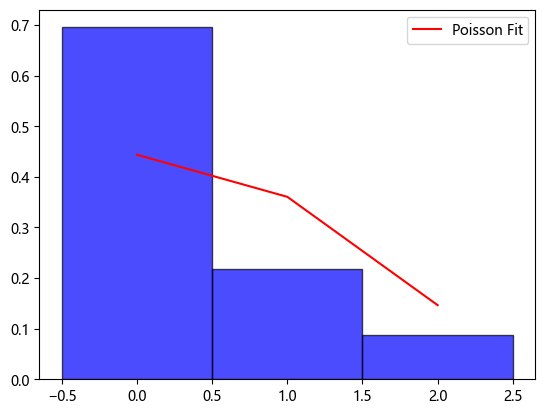

In [17]:
from scipy.stats import poisson
plt.rcParams['font.family']="Microsoft YaHei"
plt.hist(df_erosion['num_distress'], 
        bins=np.arange(df_erosion['num_distress'].max()+2)-0.5,
        density=True,
        facecolor="blue", edgecolor="black", alpha=0.7)
x = np.arange(0, df_erosion['num_distress'].max()+1) 
plt.plot(x, poisson.pmf(x, mu=0.8125), 'r-', label='Poisson Fit') 

plt.legend()
plt.show()


In [18]:
from sklearn.metrics import mean_squared_error
print("RMSE:",np.sqrt(mean_squared_error(df_erosion.predict_result,df_erosion.num_distress)))

RMSE: 0.4895481057323038
